           chr     start       end              id   clade
0    SL3.0ch00  14875562  14878935  Solyc00g102400   CNL-1
120  SL3.0ch05  57169245  57173805  Solyc05g043420   CNL-1
121  SL3.0ch05  57473246  57477680  Solyc05g044490   CNL-1
122  SL3.0ch05  60034512  60039871  Solyc05g047700   CNL-1
123  SL3.0ch05  61455806  61460226  Solyc05g050430   CNL-1
124  SL3.0ch05  64826793  64829910  Solyc05g053990   CNL-1
125  SL3.0ch05  64834011  64839530  Solyc05g054010   CNL-1
118  SL3.0ch05  55730140  55730748  Solyc05g042090   CNL-1
126  SL3.0ch05  64840496  64844954  Solyc05g054020   CNL-1
129  SL3.0ch06   2325941   2332226  Solyc06g008400   CNL-1
130  SL3.0ch06   2350825   2358814  Solyc06g008450   CNL-1
131  SL3.0ch06   2368192   2375948  Solyc06g008480   CNL-1
132  SL3.0ch06   2700827   2705543  Solyc06g008770   CNL-1
133  SL3.0ch06   2717660   2724883  Solyc06g008790   CNL-1
134  SL3.0ch06   2744132   2748459  Solyc06g008800   CNL-1
127  SL3.0ch05  65114084  65122866  Solyc05g054340   CNL

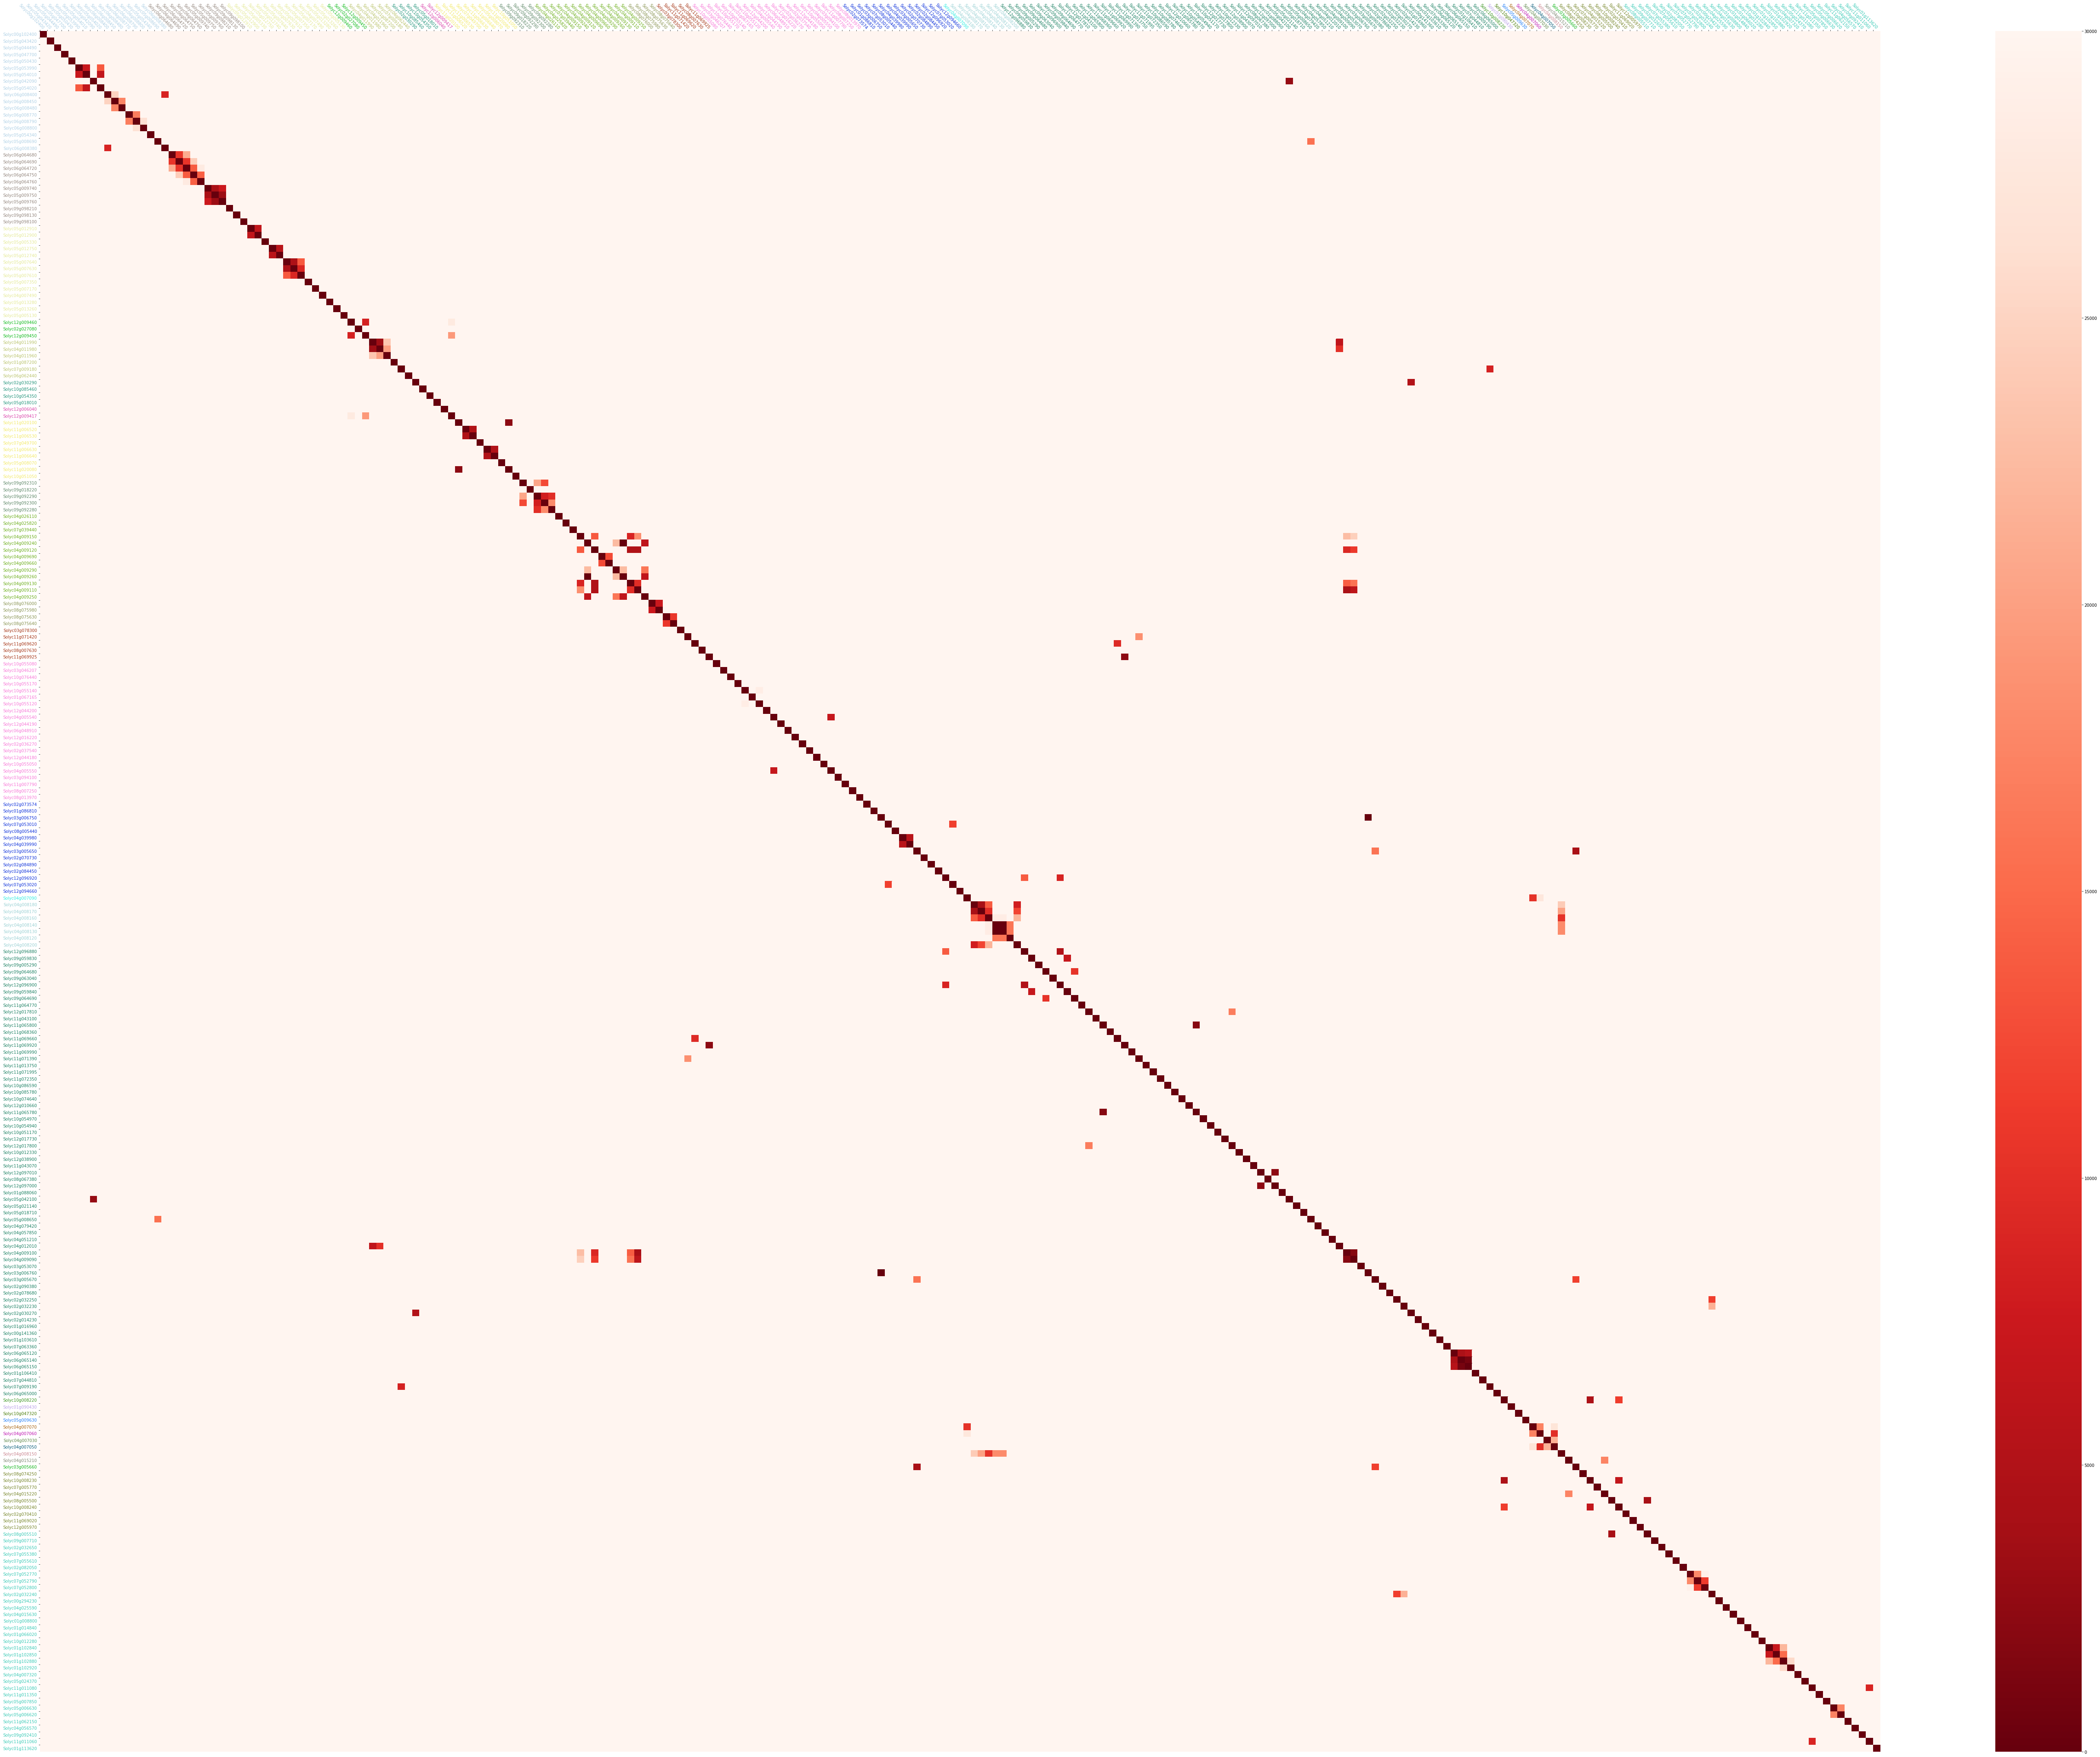

In [61]:
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]

# extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

clade_info.columns = ["id", "clade"]

position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist

# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

print(position_data)

clades = np.array(position_data["clade"])
x, clades_index = np.unique(clades,return_inverse = True)

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = 30000

dist = np.array(dist)

dist[dist>30000] = 30000
# dist[dist==0] = 30000
print(dist)
# dist = 50000/dist
fig, ax = plt.subplots(figsize=(80,60))
im = sns.heatmap(dist, cmap="Reds_r")
# im = sns.clustermap(dist, cmap="Reds_r", row_linkage=Z, col_linkage=Z)

# We want to show all ticks...
ax.set_xticks(np.arange(len(position_data["chr"].tolist())))
ax.set_yticks(np.arange(len(position_data["chr"].tolist())))
# ... and label them with the respective list entries
ax.set_xticklabels(position_data["id"].tolist(), va="center")
ax.set_yticklabels(position_data["id"].tolist(), va="center")

ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor", va="center")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor", va="center")

dx = 30/dist.shape[0]; dy = 0 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
dx = 0; dy = -30/dist.shape[0] 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

colorlist = []
for i in range(len(np.unique(clades_index))):
    colorlist.append([np.random.random(), np.random.random(), np.random.random()])

for i, x_tick in enumerate(ax.xaxis.get_ticklabels()):
    color = colorlist[clades_index[i]]
    x_tick.set_color(color)

for i, y_tick in enumerate(ax.yaxis.get_ticklabels()):
    color = colorlist[clades_index[i]]
    y_tick.set_color(color)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.show()

In [71]:
### To excel data

import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]

# extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

clade_info.columns = ["id", "clade"]

position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist


# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = np.nan

dist.index = position_data["id"].values
dist.columns = position_data["id"].values
dist["clade"] = position_data["clade"].values

dist.to_csv("original_data/NLR_distance_matrix.csv")

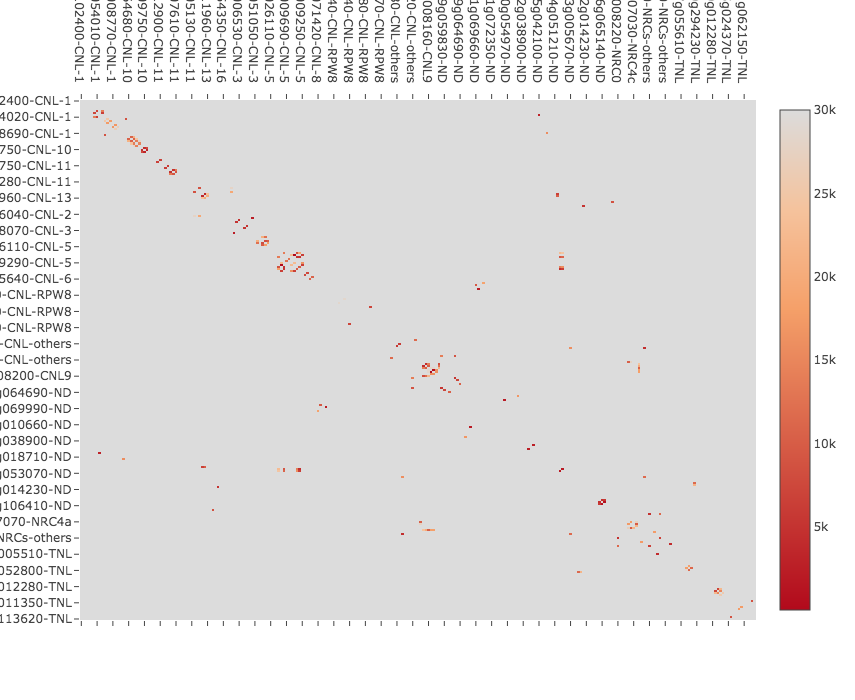

In [169]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

threshold = 30000

# extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]

# extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

clade_info.columns = ["id", "clade"]

position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist

# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

position_data['id_clade'] = position_data['id'].str.cat(position_data['clade'], sep='-')

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = threshold

dist = np.array(dist)
dist = np.flip(dist, 0)
dist[dist==0] = 30000
dist[dist>threshold] = threshold

hovertext = list()
for yi, yy in enumerate(position_data["id"].values[::-1]):
    hovertext.append(list())
    for xi, xx in enumerate(position_data["id"].values):
        hovertext[-1].append('1: {} {}<br />2: {} {}<br />Distance: {}'.format(yy, position_data["clade"].values[::-1][yi], xx, position_data["clade"].values[xi], dist[yi][xi]))

trace = go.Heatmap(z=dist, colorscale="Reds", reversescale=True, x=position_data["id_clade"], y=position_data["id_clade"].values[::-1], hoverinfo='text', text=hovertext)
data=[trace]

layout = go.Layout(width = 700, height = 700, autosize = False, xaxis={"mirror" : "allticks", 'side': 'top'} )
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='basic-heatmap')